In [10]:
# Imports using Sklearn make shortcut functions
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('/Users/nieksonneveld/code/nieksonneveld/election-predictor/raw_data/clean_polling_combined_with_national_results (1).csv')

In [20]:
data.head()

,startdate,enddate,pollster,samplesize,rating,next_elec_date,days_to_elec,BRX_FC,CON_FC,GRE_FC,...,UKI_FC,BRX_ACT,CON_ACT,GRE_ACT,LIB_ACT,LAB_ACT,PLC_ACT,SNP_ACT,UKI_ACT,OTH_PERCENTAGE
0,2004-01-02,2004-01-04,Populus,566,D+,2005-05-05,489,NaN,35.0,NaN,...,NaN,0.0,32.359595,0.94909,22.025555,35.187187,0.64403,1.51862,2.232152,5.083771
1,2004-01-16,2004-01-18,ICM,1007,D+,2005-05-05,475,NaN,34.0,NaN,...,NaN,0.0,32.359595,0.94909,22.025555,35.187187,0.64403,1.51862,2.232152,5.083771
2,2004-02-06,2004-02-08,Populus,580,D+,2005-05-05,454,NaN,31.0,NaN,...,NaN,0.0,32.359595,0.94909,22.025555,35.187187,0.64403,1.51862,2.232152,5.083771
3,2004-02-20,2004-02-22,ICM,1006,D+,2005-05-05,440,NaN,34.0,NaN,...,NaN,0.0,32.359595,0.94909,22.025555,35.187187,0.64403,1.51862,2.232152,5.083771
4,2004-03-05,2004-03-07,Populus,573,D+,2005-05-05,426,NaN,34.0,NaN,...,NaN,0.0,32.359595,0.94909,22.025555,35.187187,0.64403,1.51862,2.232152,5.083771


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   startdate       3260 non-null   object 
 1   enddate         3260 non-null   object 
 2   pollster        3260 non-null   object 
 3   samplesize      3260 non-null   int64  
 4   rating          3260 non-null   object 
 5   next_elec_date  3260 non-null   object 
 6   days_to_elec    3260 non-null   int64  
 7   BRX_FC          187 non-null    float64
 8   CON_FC          3260 non-null   float64
 9   GRE_FC          1282 non-null   float64
 10  LAB_FC          3260 non-null   float64
 11  LIB_FC          3260 non-null   float64
 12  NAT_FC          78 non-null     float64
 13  OTH_FC          3228 non-null   float64
 14  PLC_FC          336 non-null    float64
 15  SNP_FC          617 non-null    float64
 16  UKI_FC          2528 non-null   float64
 17  BRX_ACT         3260 non-null   f

In [22]:
data.describe()

,samplesize,days_to_elec,BRX_FC,CON_FC,GRE_FC,LAB_FC,LIB_FC,NAT_FC,OTH_FC,PLC_FC,...,UKI_FC,BRX_ACT,CON_ACT,GRE_ACT,LIB_ACT,LAB_ACT,PLC_ACT,SNP_ACT,UKI_ACT,OTH_PERCENTAGE
count,3260.000000,3260.000000,187.000000,3260.000000,1282.000000,3260.000000,3260.000000,78.000000,3228.000000,336.000000,...,2528.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000
mean,1824.745092,636.891104,10.652406,35.624540,4.282371,35.716258,11.652761,5.141026,6.720260,0.601190,...,9.055380,0.271650,37.958912,2.797909,11.255411,31.225210,0.564912,3.889120,8.238620,3.798255
std,2223.200161,515.634316,6.486714,4.644015,1.831672,5.440028,4.880622,1.543519,3.876638,0.496434,...,5.174144,0.687820,2.784648,1.105152,5.879049,2.752463,0.042075,1.209679,5.383343,0.933444
min,530.000000,1.000000,1.000000,17.000000,1.000000,18.000000,4.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,32.359595,0.893429,7.365410,28.989564,0.478805,1.518620,0.071281,3.273254
25%,1314.000000,191.000000,4.000000,32.000000,3.000000,32.000000,8.000000,4.000000,5.000000,0.000000,...,4.000000,0.000000,36.810989,1.590911,7.870500,30.450615,0.557103,3.035607,3.098588,3.273254
50%,1779.500000,531.500000,11.000000,35.000000,4.000000,36.000000,10.000000,6.000000,7.000000,1.000000,...,9.000000,0.000000,36.810989,3.621042,7.870500,30.450615,0.591942,4.738156,12.643503,3.273254
75%,2012.000000,1002.000000,14.000000,39.000000,5.000000,40.000000,14.000000,6.000000,9.000000,1.000000,...,13.000000,0.000000,36.810989,3.621042,11.547741,30.450615,0.591942,4.738156,12.643503,3.683662
max,105612.000000,1821.000000,26.000000,52.000000,17.000000,46.000000,34.000000,8.000000,30.000000,2.000000,...,25.000000,2.012681,43.631688,3.621042,23.028931,39.989322,0.644030,4.738156,12.643503,5.723300


In [23]:
data.rating.value_counts()

rating
A-    2130
D+     613
B+     281
D       65
F       56
D-      52
B       49
C-      14
Name: count, dtype: int64

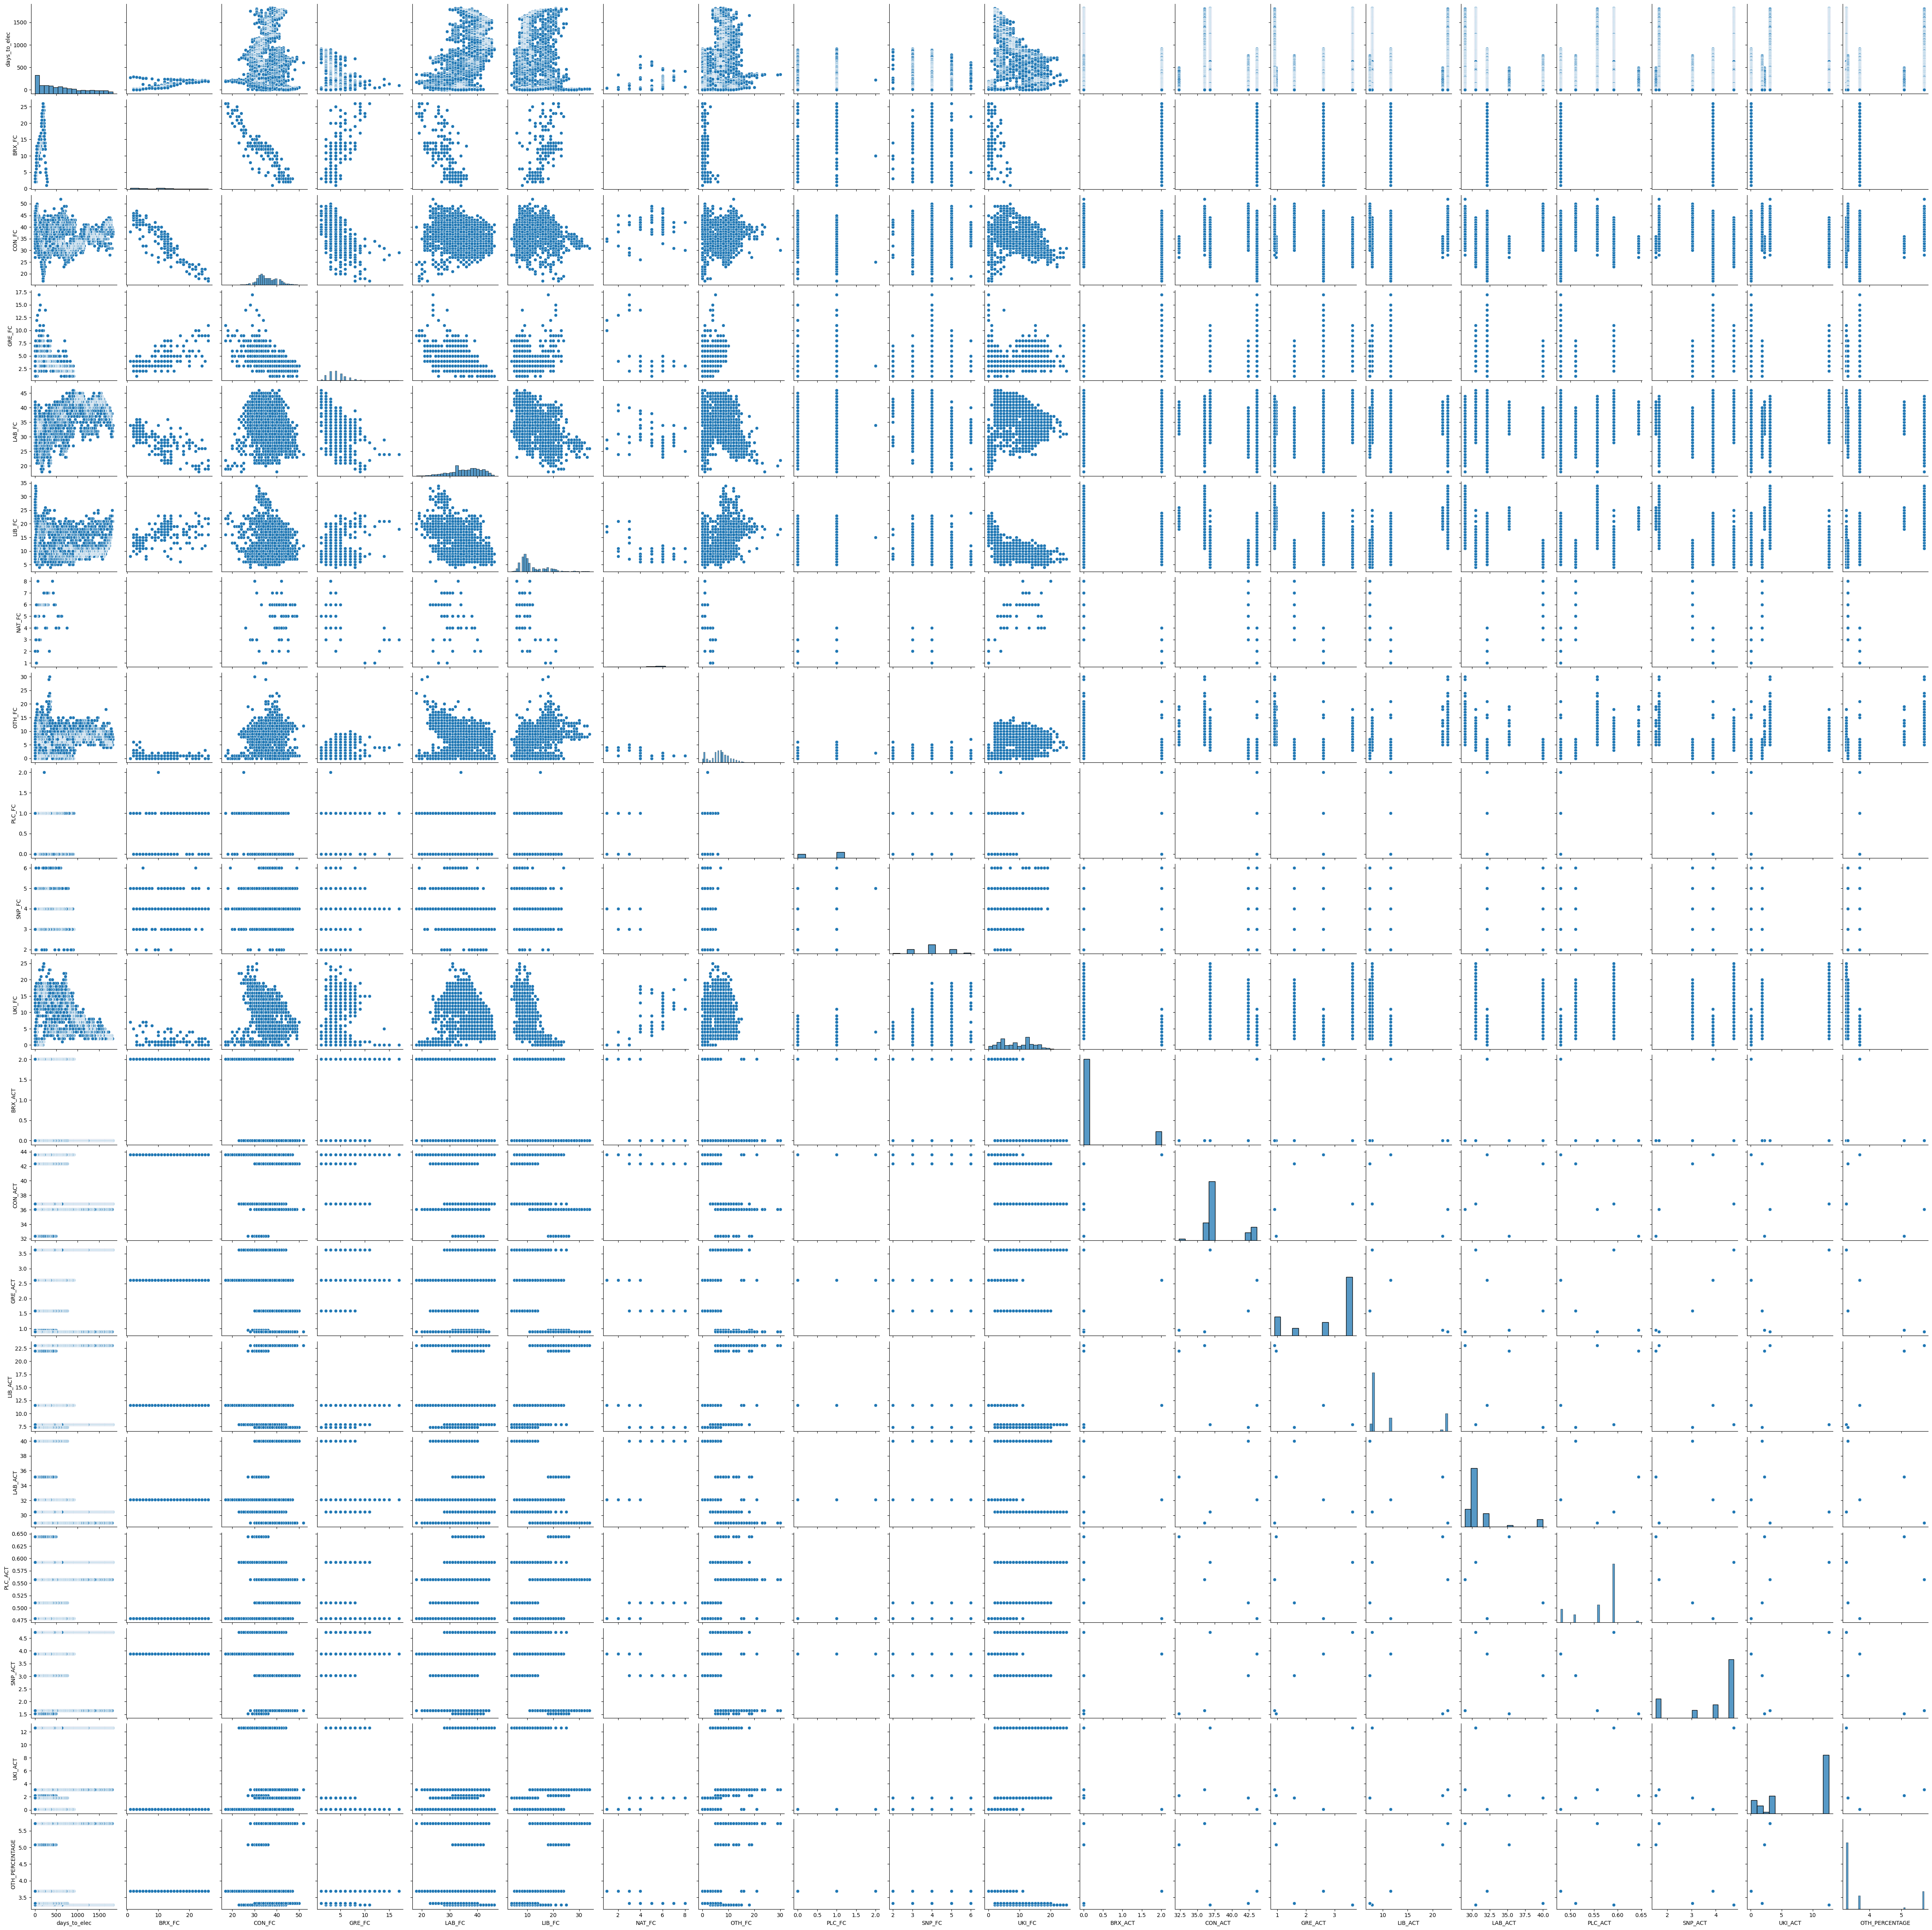

In [14]:
sns.pairplot(data)

In [16]:
data.columns

Index(['startdate', 'enddate', 'pollster', 'rating', 'next_elec_date',
       'days_to_elec', 'BRX_FC', 'CON_FC', 'GRE_FC', 'LAB_FC', 'LIB_FC',
       'NAT_FC', 'OTH_FC', 'PLC_FC', 'SNP_FC', 'UKI_FC', 'BRX_ACT', 'CON_ACT',
       'GRE_ACT', 'LIB_ACT', 'LAB_ACT', 'PLC_ACT', 'SNP_ACT', 'UKI_ACT',
       'OTH_PERCENTAGE'],
      dtype='object')

In [ ]:
#TODO Build num transformer

num_col =
num_transformer = make_pipeline(SimpleImputer(), MinMaxScaler())

In [ ]:
#TODO Build cat transformer (encoding and imputing etc)

cat_col =
cat_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown='ignore'))

In [ ]:
#TODO Build any required column transformers (use column selectors if necessary)

preproc_baseline = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='drop'
)

In [ ]:
#TODO Build union of of transformers into full preprocessor pipeline

# not sure we need this

In [ ]:
#TODO Export pipeline as a Pickle file for use in the API